In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import networkx as nx

Data = pd.read_csv("Loan_Default_Cleaned.csv")
print(Data.isna().sum().sum())
CData = Data.dropna()
CData.shape
CData = CData.drop(["Unnamed: 0"], axis = 1)
print(CData.describe())

6
           year   loan_amount  rate_of_interest  Interest_rate_spread  \
count  148668.0  1.486680e+05     148668.000000         148668.000000   
mean     2019.0  3.311200e+05          4.044898              0.441676   
std         0.0  1.839094e+05          0.561044              0.513070   
min      2019.0  1.650000e+04          0.000000             -3.638000   
25%      2019.0  1.965000e+05          3.625000              0.076000   
50%      2019.0  2.965000e+05          3.990000              0.389950   
75%      2019.0  4.365000e+05          4.375000              0.775100   
max      2019.0  3.576500e+06          8.000000              3.357000   

       Upfront_charges           term  property_value         income  \
count    148668.000000  148668.000000    1.486680e+05  148668.000000   
mean       3224.762431     335.138261    4.981473e+05    6957.396077   
std        3246.623119      58.408211    3.597563e+05    6446.149569   
min           0.000000      96.000000    8.000000e+0

In [2]:
#sns.pairplot(CData)

<AxesSubplot:>

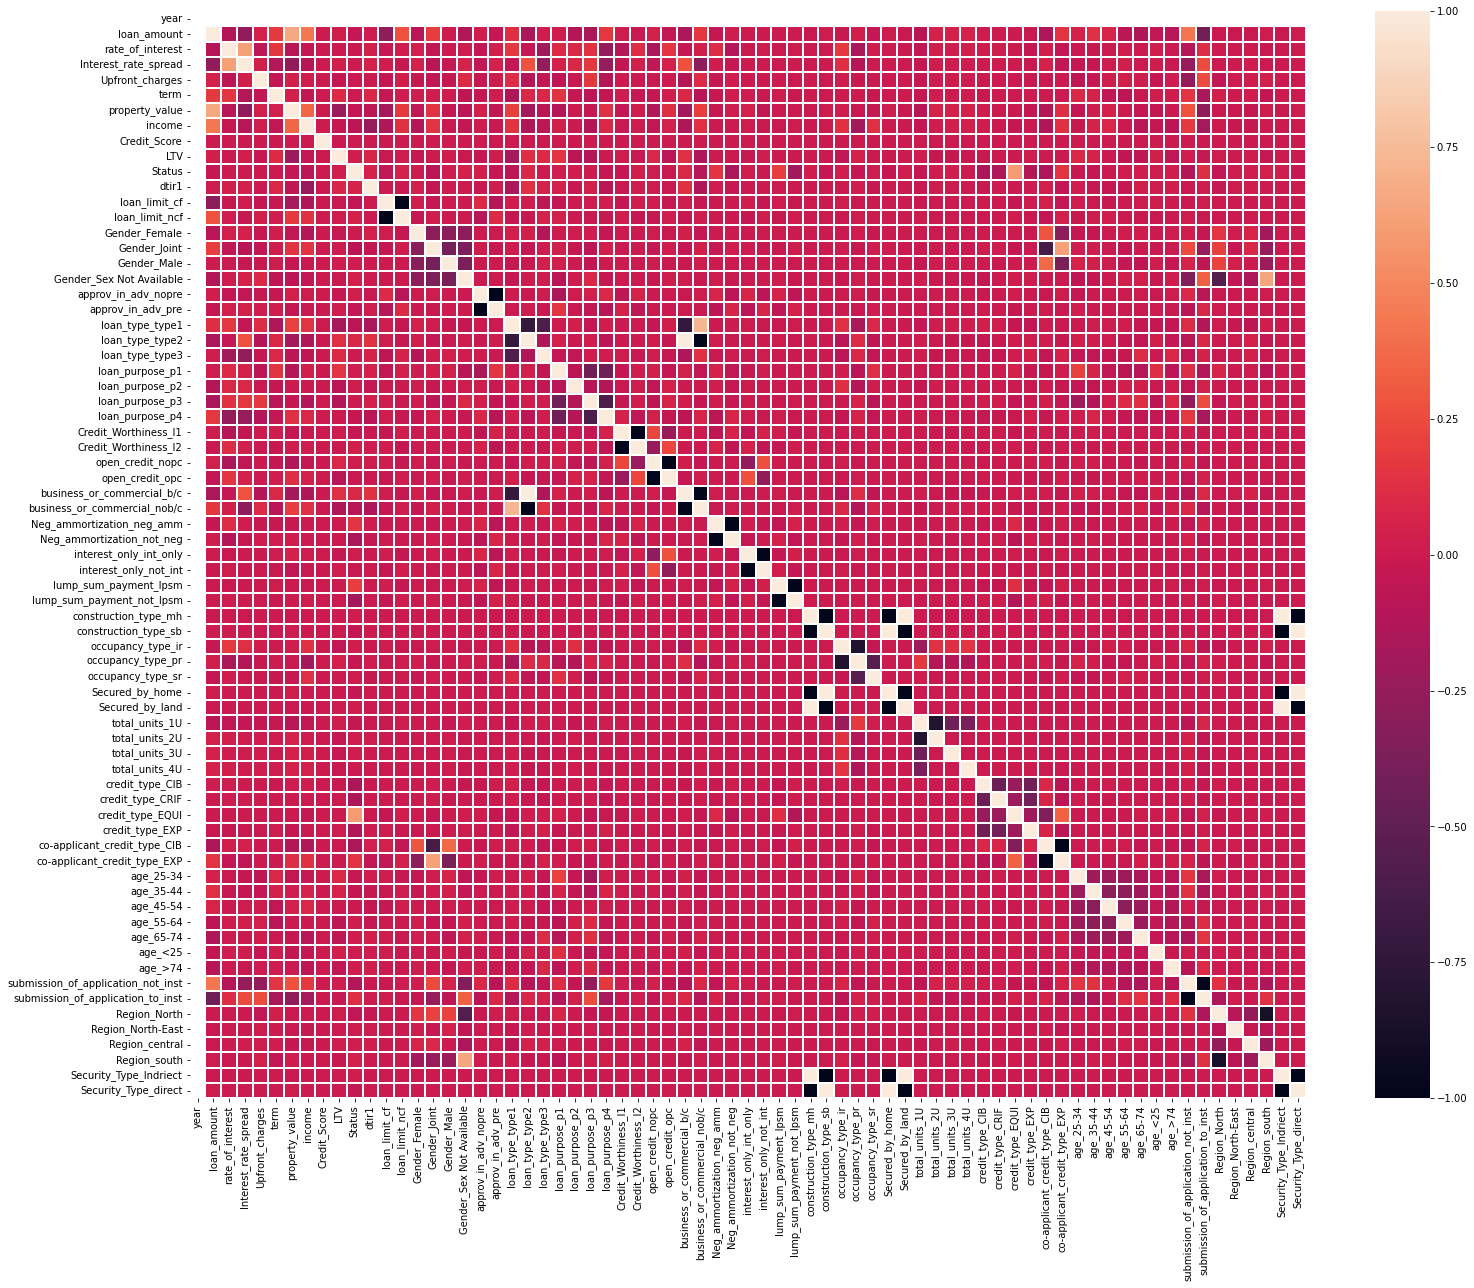

In [3]:
plt.figure(figsize=[25,20])
Correlation = CData.corr()
labels = Correlation.index.values
Corr_Matrix = np.asmatrix(Correlation)
sns.heatmap(Correlation, linewidth=0.01)

In [4]:
## Adapted from this source: https://towardsdatascience.com/visualising-stocks-correlations-with-networkx-88f2ee25362e

#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(Corr_Matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: labels[x])

In [13]:
plt.figure(figsize=(40,40))
# Positions the Nodes in Random Placements 
positions=nx.rand_layout(G)

edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())

nx.draw_networkx_nodes(G, positions,  node_size = 2000)
nx.draw_networkx_labels(G, positions, font_weight = "bold")
nx.draw_networkx_edges(G, positions,width = 0.3, edgelist = edges, style='solid')

NetworkXException: G is not planar.

<Figure size 2880x2880 with 0 Axes>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = CData.drop(["Status"], axis = 1)
Y = CData["Status"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
Log = LogisticRegression().fit(X_train, Y_train)
predict = Log.predict(X_test)
mean_squared_error(Y_test, predict)


0.24332414071433375